###  Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report 

###  Load and Explore the Dataset

In [3]:
# Create DataFrame
data = {
    "Transaction_ID": [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,
                       1011,1012,1013,1014,1015,1016,1017,1018,1019,1020],
    "Amount": [12.50,520.00,87.90,3000.00,45.30,1500.00,22.00,250.00,5200.00,16.75,
               180.00,60.40,750.00,33.60,2000.00,120.00,90.50,3100.00,17.80,4100.00],
    "Transaction_Type": ["POS","Online","ATM","Online","POS","Online","POS","ATM","Online","POS",
                         "Online","ATM","Online","POS","Online","ATM","POS","Online","POS","Online"],
    "Location": ["Mumbai","Delhi","Chennai","New York","Pune","Mumbai","Bangalore","Hyderabad","London","Kolkata",
                 "Delhi","Chennai","Singapore","Pune","New York","Mumbai","Delhi","London","Chennai","Singapore"],
    "Time_Hour": [14,2,10,23,18,1,9,11,3,13,22,19,0,8,16,12,20,4,7,21],
    "Device_Type": ["Mobile","Desktop","Mobile","Laptop","Mobile","Tablet","Mobile","Desktop","Laptop","Mobile",
                    "Laptop","Mobile","Tablet","Mobile","Desktop","Mobile","Mobile","Laptop","Mobile","Tablet"],
    "Account_Age_Years": [3,1,5,2,4,1,6,2,1,8,2,5,3,7,1,6,4,2,9,1],
    "Num_Past_Frauds": [0,1,0,2,0,1,0,0,3,0,0,0,1,0,2,0,0,1,0,3],
    "Is_Foreign": [0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1],
    "Fraudulent": [0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1]
}

df = pd.DataFrame(data)

# Display first 5 rows 
print(df.head())

# Check missing values 
print(df.isnull().sum()) 
 
# Check class distribution 
print(df['Fraudulent'].value_counts())  # Target column: 1 = Fraud, 0 = Not Fraud 

   Transaction_ID  Amount Transaction_Type  Location  Time_Hour Device_Type  \
0            1001    12.5              POS    Mumbai         14      Mobile   
1            1002   520.0           Online     Delhi          2     Desktop   
2            1003    87.9              ATM   Chennai         10      Mobile   
3            1004  3000.0           Online  New York         23      Laptop   
4            1005    45.3              POS      Pune         18      Mobile   

   Account_Age_Years  Num_Past_Frauds  Is_Foreign  Fraudulent  
0                  3                0           0           0  
1                  1                1           1           1  
2                  5                0           0           0  
3                  2                2           1           1  
4                  4                0           0           0  
Transaction_ID       0
Amount               0
Transaction_Type     0
Location             0
Time_Hour            0
Device_Type          0
Acc

###  Preprocessing & Feature Engineering

In [4]:
# Convert categorical variables to numerical 
df = pd.get_dummies(df, drop_first=True) 
 
# Define Features (X) and Target (y) 
X = df.drop('Fraudulent', axis=1) 
y = df['Fraudulent'] 
 
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

### Apply Cross-Validation

In [5]:
model = RandomForestClassifier() 
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
 
print("Cross-validation scores:", scores) 
print("Mean Accuracy:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


###  Perform Grid Search for Hyperparameter Tuning

In [6]:
param_grid = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15], 
    'criterion': ['gini', 'entropy'] 
} 
 
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, 
scoring='accuracy') 
grid_search.fit(X_train, y_train) 
 
print("Best Parameters:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
Best Score: 1.0


###  Perform Randomized Search for Hyperparameter Tuning

In [7]:
param_dist = { 
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15], 
    'criterion': ['gini', 'entropy'] 
} 
 
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train) 
 
print("Best Parameters (Randomized Search):", random_search.best_params_) 
print("Best Score:", random_search.best_score_)

Best Parameters (Randomized Search): {'n_estimators': 50, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 1.0


###  Feature Importance Analysis

Feature Importance:
 Is_Foreign                 0.188246
Num_Past_Frauds            0.184651
Amount                     0.178891
Transaction_Type_Online    0.164222
Account_Age_Years          0.080198
Device_Type_Mobile         0.079913
Device_Type_Tablet         0.025035
Time_Hour                  0.020475
Transaction_Type_POS       0.016932
Location_Singapore         0.015509
Location_Hyderabad         0.011798
Transaction_ID             0.010640
Device_Type_Laptop         0.010388
Location_New York          0.006430
Location_Delhi             0.003171
Location_Chennai           0.002308
Location_Pune              0.001111
Location_Mumbai            0.000081
Location_Kolkata           0.000000
Location_London            0.000000
dtype: float64


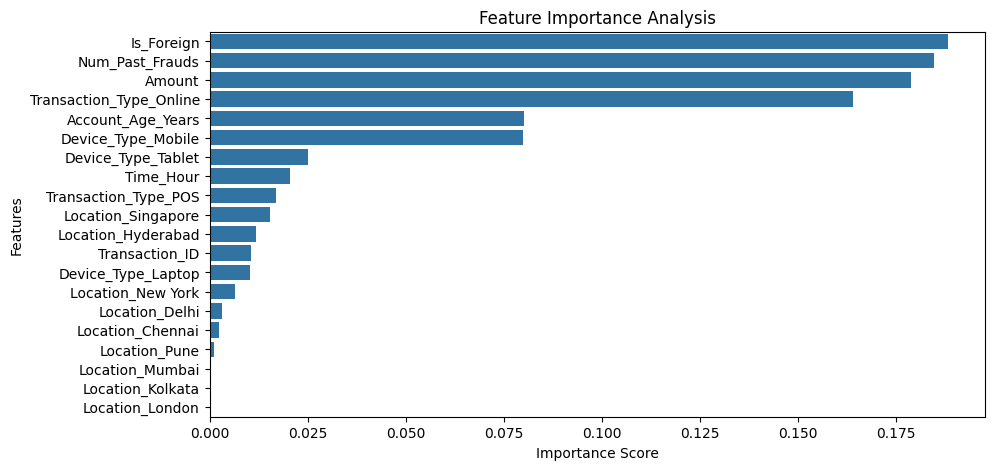

In [8]:
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train) 
 
# Get feature importances 
feature_importance = pd.Series(model.feature_importances_, 
index=X.columns).sort_values(ascending=False) 
print("Feature Importance:\n", feature_importance) 
 
plt.figure(figsize=(10, 5)) 
sns.barplot(x=feature_importance, y=feature_importance.index) 
plt.xlabel('Importance Score') 
plt.ylabel('Features') 
plt.title('Feature Importance Analysis') 
plt.show() 

###  Evaluate the Final Model

In [9]:
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

